# Real Estate Prices in King County

## Goals of this Analysis

I will start the notebook by listing the actual goals of this analysis, i.e. what is it that I am trying to achieve? 

Specifically, there are 3 major goals of this document:
1. Provide at **least 3 recommendations** for home seller and/or buyers in King County
2. **Predict the Sales Prices** of the real estate using a **multiple linear regression**. Here, I am to achieve an R-square between 0.7 and 0.9
3. Improve the accuracy of the model using **train/test split method** and minimize the Root Mean Square Error

## How will I get there?

Throughout the document I will be using the Data Science Lifycycle as depicted below as the general guideline. 
1. Therefore, I will begin all my efforts by setting up precise business/research questions for each of the goals listed above. 

2. Next, I will be loading the dataset, taking a first glance at it and see if I understand its content. 

3. From here I will examine inconsistencies such as missing values, incorrectly labeled data and more to prepare the data for a first analysis.

4. Afterwards, it is time to begin with an exploratory data analysis and look for interesting patterns that can help to answer the business questions

5. To spice things up, I will be searching for additional features to import into the data set, which will help to improve the accuracy of the forecasting model. Ideas include: 

    * classifications into neighborhoods
    * coffee prices per neighborhood 
    * connectivity in each neighborhood
    * interest rates over time etc

6. Using these features, I will then try to most accurately predict the real estate Sales Price in King County 

7. Finally, I will visualize the results in a way that will allow anybody to understand the outcome

### Image - Data Science Lifecycle Overview

The image below provides a comprehensive overview of the full data science lifecycle and is used a as guideline for this EDA and Sales Price prediction model

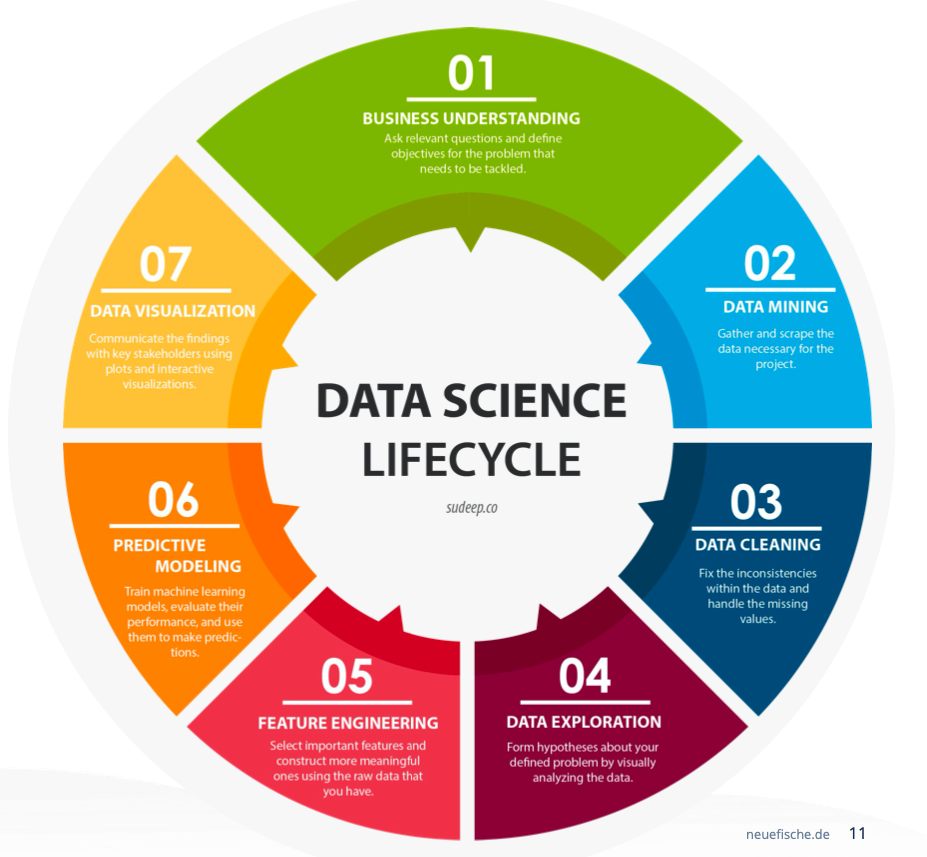

In [83]:
from IPython.display import Image
Image("/Users/tobiasseidel/Projects/First_Project/2020-ds-Project-EDA/DataScienceLifeCycle.png", width = 400, height = 400)

# Business Questions

**Goal 1:**
* Find the most interesting house offers for a wealthy business man. He lives alone but needs plenty of space for ravish uptown parties - and he can afford it. Of course, he has his eyes only on the most exclusive properties in the Seattle area. The client has a particular appetite for modern buildings and prefers a waterfront view. There is no need for more than 2 bedrooms, 2 bathrooms will also suffice. However, the living_sqm space is to be maximized and more important than purchase price. 

**Goal 2:**
* Find the features that allow me to most accurately predict the housing prices for our clients tastes. Here, emphasis will be placed on the R-square value but also on minimizing the standard error value

**Goal 3:**
* Improving model accuracy through a reduction in RMSE means to find a line that more accurately reflects the underlying data points

# Data Mining

Now that the targets are defined, I will begin by loading the data and taking an initial look at the respective features

## Column Names and Descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Importing Libaries and Dataset

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

In [6]:
house = pd.read_csv("King_County_House_prices_dataset.csv")

### Taking a Preview at the Data

In [7]:
house.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [8]:
house.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

**Commentary** 

* Based on this very first glance, I can immediately detect some missing values which will need to be addressed in the data cleaning section. 
* Likewise, the columns date and yr_build indicate that we have time series data which will add another dimension to the analysis
* Finally, there are some values that will require some research such as:
    * **price** -> Currency? 
    * **grade** --> what is the grading system based on?
    * **sqft units** --> converted to metrics for easier understanding? 
    * **lat & long** --> further research needed to make these features useful

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Commentary**

The `.info()` command confirms the first impression that missing data might be a concern. In particular, I can derive the following: 
   * **missing values** for *waterfront*, *view*, and *yr_renovated*
   * There are two columns with data type **object**. I will need to address this in the data cleaning section
   * Overall, a medium sized data sample with 21597 rows 

In [10]:
house.describe().round(1)

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  2.159700e+04    21597.0   21597.0    21597.0      21597.0    21597.0   
mean   4.580474e+09   540296.6       3.4        2.1       2080.3    15099.4   
std    2.876736e+09   367368.1       0.9        0.8        918.1    41412.6   
min    1.000102e+06    78000.0       1.0        0.5        370.0      520.0   
25%    2.123049e+09   322000.0       3.0        1.8       1430.0     5040.0   
50%    3.904930e+09   450000.0       3.0        2.2       1910.0     7618.0   
75%    7.308900e+09   645000.0       4.0        2.5       2550.0    10685.0   
max    9.900000e+09  7700000.0      33.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count  21597.0     19221.0  21534.0    21597.0  21597.0     21597.0   21597.0   
mean       1.5         0.0      0.2        3.4      7.7      1788.6    1971.0   
std        0.5         0.1      0.8        0.7      1.2       827.8      29.4   
min        1.0         0.0      0.0        1.0      3.0       370.0    1900.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0    1951.0   
50%        1.5         0.0      0.0        3.0      7.0      1560.0    1975.0   
75%        2.0         0.0      0.0        4.0      8.0      2210.0    1997.0   
max        3.5         1.0      4.0        5.0     13.0      9410.0    2015.0   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count       17755.0  21597.0  21597.0  21597.0        21597.0     21597.0  
mean           83.6  98078.0     47.6   -122.2         1986.6     12758.3  
std           399.9     53.5      0.1      0.1          685.2     27274.4  
min             0.0  98001.0     47.2   -122.5          399.0       651.0  
25%             0.0  98033.0     47.5   -122.3         1490.0      5100.0  
50%             0.0  98065.0     47.6   -122.2         1840.0      7620.0  
75%             0.0  98118.0     47.7   -122.1         2360.0     10083.0  
max          2015.0  98199.0     47.8   -121.3         6210.0    871200.0

**Commentary**

With 19 columns displayed, the `describe()` function provides a large amount of information to be processed. A few highlights stand out: 
   * There is a **strong discrepancy between mean price and median price**. Very expensive properties could hereby have large influence
   * This observation is confirmed for the features *bedrooms, bathrooms, sqft_living, sqft_lot*

# Data Cleaning

As I could see already, the dataset contains missing values which need to be addressed. In addition, the data types object need to be transformed to be able to use the data in the analysis later on. 

## Missing Values

In [714]:
house.isna().sum()

id              0
date            0
price           0
bedrooms        0
bathrooms       0
living_sqm      0
lot_sqm         0
floors          0
waterfront      0
view            0
condition       0
grade           0
above_sqm       0
basement_sqm    0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
living15_sqm    0
lot15_sqm       0
geo_coord       0
geo_coord2      0
dtype: int64

In [12]:
missing = pd.DataFrame(house.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/house.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

It becomes evident that for *view*, there is only a minor percentage of values missing. 
Possible strategies: 
* replace yr_renovated missing values with median values which is 0
* replace waterfront missing values with 0
* drop rows with missing view values

In [428]:
house["yr_renovated"].fillna(0, inplace = True)

In [429]:
house["waterfront"].fillna(0, inplace = True)

In [430]:
house['view'].fillna(house['view'].median(), inplace = True)

In [433]:
house['basement_sqm'].fillna(house['basement_sqm'].median(),inplace=True)

In [434]:
house.head()

id       date     price  bedrooms  bathrooms  living_sqm  lot_sqm  \
0  7129300520 2014-10-13  221900.0         3       1.00      109.63   524.90   
1  6414100192 2014-12-09  538000.0         3       2.25      238.76   672.80   
2  5631500400 2015-02-25  180000.0         2       1.00       71.54   929.03   
3  2487200875 2014-12-09  604000.0         4       3.00      182.09   464.52   
4  1954400510 2015-02-18  510000.0         3       2.00      156.08   750.66   

   floors  waterfront  view  ...  basement_sqm  yr_built  yr_renovated  \
0     1.0         0.0   0.0  ...          0.00      1955           0.0   
1     2.0         0.0   0.0  ...         37.16      1951        1991.0   
2     1.0         0.0   0.0  ...          0.00      1933           0.0   
3     1.0         0.0   0.0  ...         84.54      1965           0.0   
4     1.0         0.0   0.0  ...          0.00      1987           0.0   

   zipcode      lat     long  living15_sqm  lot15_sqm  \
0    98178  47.5112 -122.257        124.49     524.90   
1    98125  47.7210 -122.319        157.01     709.69   
2    98028  47.7379 -122.233        252.70     748.98   
3    98136  47.5208 -122.393        126.35     464.52   
4    98074  47.6168 -122.045        167.23     697.05   

                        geo_coord  \
0             (47.5112, -122.257)   
1  (47.721000000000004, -122.319)   
2  (47.7379, -122.23299999999999)   
3  (47.5208, -122.39299999999999)   
4             (47.6168, -122.045)   

                                          geo_coord2  
0  {'country_code': 'US', 'city': 'Bryn Mawr-Skyw...  
1  {'country_code': 'US', 'city': 'Shoreline', 'c...  
2  {'country_code': 'US', 'city': 'Inglewood-Finn...  
3  {'country_code': 'US', 'city': 'White Center',...  
4  {'country_code': 'US', 'city': 'City of Sammam...  

[5 rows x 23 columns]

In [435]:
house.isna().sum()

id              0
date            0
price           0
bedrooms        0
bathrooms       0
living_sqm      0
lot_sqm         0
floors          0
waterfront      0
view            0
condition       0
grade           0
above_sqm       0
basement_sqm    0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
living15_sqm    0
lot15_sqm       0
geo_coord       0
geo_coord2      0
dtype: int64

## Convert Data Types

### Convert sqft_basement to numeric value

In [461]:
# Convert basement column to numeric value
house["sqft_basement"] = pd.to_numeric(house["sqft_basement"], errors='coerce')

KeyError: 'sqft_basement'

In [14]:
# error = 'coerce' will set all non-numeric values to NaN. 
# Let's check how many null values there are now

house["sqft_basement"].isna().sum()

454

In [15]:
missing = pd.DataFrame(house.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/house.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

We see that there are now 2.1% of values for sqft_basement marked as missing. This percentage is still acceptable and should not decrease the prediction performance later on by too much.

### Convert date from object to date time

In [16]:
house["date"] = pd.to_datetime(house["date"], errors='coerce')

In [17]:
house["date"].isna().sum()

0

In [716]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21597 non-null  int64         
 1   date          21597 non-null  datetime64[ns]
 2   price         21597 non-null  float64       
 3   bedrooms      21597 non-null  int64         
 4   bathrooms     21597 non-null  float64       
 5   living_sqm    21597 non-null  float64       
 6   lot_sqm       21597 non-null  float64       
 7   floors        21597 non-null  float64       
 8   waterfront    21597 non-null  float64       
 9   view          21597 non-null  float64       
 10  condition     21597 non-null  int64         
 11  grade         21597 non-null  int64         
 12  above_sqm     21597 non-null  float64       
 13  basement_sqm  21597 non-null  float64       
 14  yr_built      21597 non-null  int64         
 15  yr_renovated  21597 non-null  float6

### Convert square feet to metric units

From [convertunits.com](https://www.convertunits.com/) I will take the conversion value from square feet to square meter of: 
* 1 square foot = 0.092903 square meters

In [715]:
sqft_to_sqmt_conversion = 0.092903
house["sqft_living"] = (house["sqft_living"] * sqft_to_sqmt_conversion).round(2)
house["sqft_lot"] = (house["sqft_lot"] * sqft_to_sqmt_conversion).round(2)
house["sqft_living15"] = (house["sqft_living15"] * sqft_to_sqmt_conversion).round(2)
house["sqft_lot15"] = (house["sqft_lot15"] * sqft_to_sqmt_conversion).round(2)

KeyError: 'sqft_living'

In [20]:
house.rename(columns={'sqft_living':'living_sqm', 
                      'sqft_lot':'lot_sqm', 
                      'sqft_living15': 'living15_sqm',
                      'sqft_lot15': 'lot15_sqm',
                      'sqft_above': 'above_sqm',
                      'sqft_basement':'basement_sqm'}, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21597 non-null  int64         
 1   date          21597 non-null  datetime64[ns]
 2   price         21597 non-null  float64       
 3   bedrooms      21597 non-null  int64         
 4   bathrooms     21597 non-null  float64       
 5   living_sqm    21597 non-null  float64       
 6   lot_sqm       21597 non-null  float64       
 7   floors        21597 non-null  float64       
 8   waterfront    19221 non-null  float64       
 9   view          21534 non-null  float64       
 10  condition     21597 non-null  int64         
 11  grade         21597 non-null  int64         
 12  above_sqm     21597 non-null  int64         
 13  basement_sqm  21143 non-null  float64       
 14  yr_built      21597 non-null  int64         
 15  yr_renovated  17755 non-null  float6

In [21]:
house["above_sqm"] = (house["above_sqm"] * sqft_to_sqmt_conversion).round(2)
house["basement_sqm"] = (house["basement_sqm"] * sqft_to_sqmt_conversion).round(2)

In [22]:
house.describe().round()

id      price  bedrooms  bathrooms  living_sqm   lot_sqm  \
count  2.159700e+04    21597.0   21597.0    21597.0     21597.0   21597.0   
mean   4.580474e+09   540297.0       3.0        2.0       193.0    1403.0   
std    2.876736e+09   367368.0       1.0        1.0        85.0    3847.0   
min    1.000102e+06    78000.0       1.0        0.0        34.0      48.0   
25%    2.123049e+09   322000.0       3.0        2.0       133.0     468.0   
50%    3.904930e+09   450000.0       3.0        2.0       177.0     708.0   
75%    7.308900e+09   645000.0       4.0        2.0       237.0     993.0   
max    9.900000e+09  7700000.0      33.0        8.0      1258.0  153416.0   

        floors  waterfront     view  condition    grade  above_sqm  \
count  21597.0     19221.0  21534.0    21597.0  21597.0    21597.0   
mean       1.0         0.0      0.0        3.0      8.0      166.0   
std        1.0         0.0      1.0        1.0      1.0       77.0   
min        1.0         0.0      0.0        1.0      3.0       34.0   
25%        1.0         0.0      0.0        3.0      7.0      111.0   
50%        2.0         0.0      0.0        3.0      7.0      145.0   
75%        2.0         0.0      0.0        4.0      8.0      205.0   
max        4.0         1.0      4.0        5.0     13.0      874.0   

       basement_sqm  yr_built  yr_renovated  zipcode      lat     long  \
count       21143.0   21597.0       17755.0  21597.0  21597.0  21597.0   
mean           27.0    1971.0          84.0  98078.0     48.0   -122.0   
std            41.0      29.0         400.0     54.0      0.0      0.0   
min             0.0    1900.0           0.0  98001.0     47.0   -123.0   
25%             0.0    1951.0           0.0  98033.0     47.0   -122.0   
50%             0.0    1975.0           0.0  98065.0     48.0   -122.0   
75%            52.0    1997.0           0.0  98118.0     48.0   -122.0   
max           448.0    2015.0        2015.0  98199.0     48.0   -121.0   

       living15_sqm  lot15_sqm  
count       21597.0    21597.0  
mean          185.0     1185.0  
std            64.0     2534.0  
min            37.0       60.0  
25%           138.0      474.0  
50%           171.0      708.0  
75%           219.0      937.0  
max           577.0    80937.0

## Categorizing Data 

In [23]:
continuous_var = list(house.select_dtypes(
                        ['int64','float64','bool']).columns.values)
continuous_var.remove('id')
#categorical_var=['Sex','Embarked']
continuous_var

['price',
 'bedrooms',
 'bathrooms',
 'living_sqm',
 'lot_sqm',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'above_sqm',
 'basement_sqm',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'living15_sqm',
 'lot15_sqm']

**Sanity checking some data**

In [462]:
# There should only be two values for waterfront: 0 for no waterfront and 1 for yes waterfront 
house["waterfront"].unique()

array([0., 1.])

In [463]:
# Likewise, there should only be 0 and 1 values for view
house["view"].unique()

array([0., 3., 4., 2., 1.])

In [464]:
house["view"].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [465]:
# condition appears to have 5 values
house["condition"].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

## Finding and Removing Outliers 

An effective way of detecting outliers is by visualizing the data points.
I will start with:
1. **bedrooms and bathrooms**
2. **living_sqm and lot_sqm**
3. **yr_build**

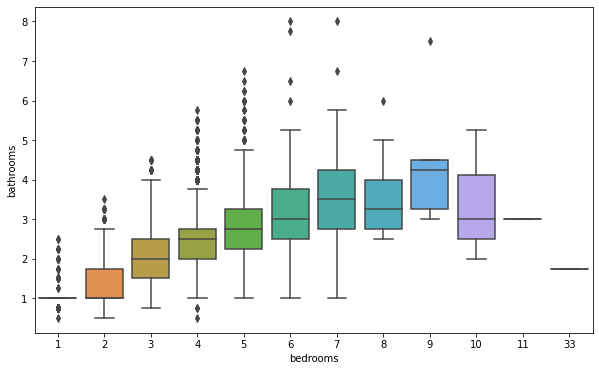

In [466]:
# plotting bedrooms and bathrooms
plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms", y="bathrooms", data=house);

**Commentary**

Plotting bedrooms and bathrooms in a boxplot, I can see a few anomalies:
1. There is one house in the dataset with 33 bedrooms but only 2 bathrooms. That could be a hostel with group showers and bathrooms. Regardless of the explanation, it certainly stands out
2. There are also a number of houses which have more bathrooms than bedrooms - something that is also not common to say the least
3. There is a small amount of houses with only 1 bedroom but 2 or more bathrooms

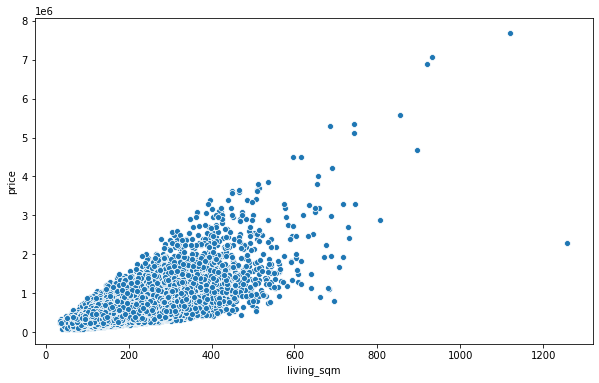

In [467]:
# plotting living_sqm and price
plt.figure(figsize=(10,6))
sns.scatterplot(x="living_sqm", y="price", data=house);

**Commentary:**

The scatter plot for living_sqm and price depicts a couple of outliers on the far right of the graph. 
The largest house in particular stands out as it is priced well below the houses of comparable size 
At the same time, it can be seen that the the relationship between living_sqm and housing price appears to be heteroskedastic.

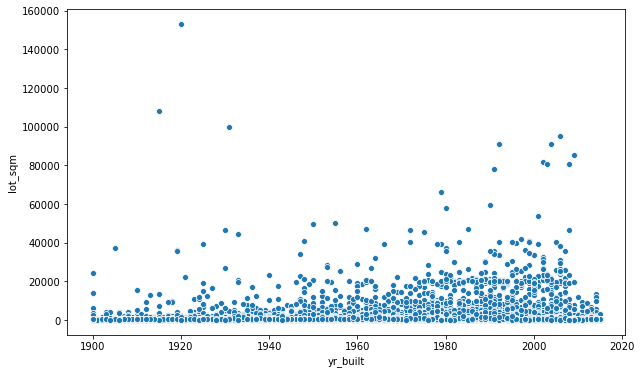

In [468]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='yr_built', y='lot_sqm', data=house)

**Commentary:**

Just as before, through the graphical visualization a number of outliers in lot_sqm can be detected. 
In contrast, there are no evident outliers for the year built. Interestingly, there appears to be a pattern that newer houses have larger lot sizes. 

### Removing Outliers through Quantiles

After the visual illustration, I will now remove outliers through standardizing the values and computing corresponding z-Scores. 
A z-Score indicates by how many standard deviations a certain data point is away from the mean. 
In a normal distribution 99.7% of the values are in between +- 3 standard deviations

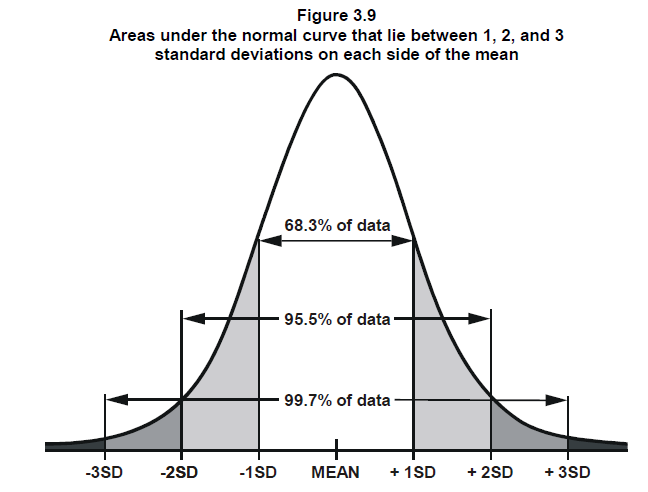

In [85]:
Image("Standard Deviation.png", width=400, height=400)

In [309]:
from scipy import stats
z = np.abs(stats.zscore(house[c]))
print(z)

/Users/tobiasseidel/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:235: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [717]:
house2 = house.copy()

In [718]:
def remove_outliers(house2):
    for col in house2.columns.drop("waterfront"):
        print("capping the ",col)
        if (((house2[col].dtype)=='float64') | ((house2[col].dtype)=='int64')):
                percentiles = house2[col].quantile([0.001,0.999]).values
                house2[col][house2[col] <= percentiles[0]] = percentiles[0]
                house2[col][house2[col] >= percentiles[1]] = percentiles[1]
        else:
            house2[col]=house2[col]
    return house2
clean_house=remove_outliers(house2)

capping the  id
capping the  date
capping the  price
capping the  bedrooms
capping the  bathrooms
capping the  living_sqm
capping the  lot_sqm
capping the  floors
capping the  view
capping the  condition
capping the  grade
capping the  above_sqm
capping the  basement_sqm
capping the  yr_built
capping the  yr_renovated
capping the  zipcode
capping the  lat
capping the  long
capping the  living15_sqm
capping the  lot15_sqm
capping the  geo_coord
capping the  geo_coord2


<ipython-input-718-8caff7f503d5>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-718-8caff7f503d5>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-718-8caff7f503d5>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-718-8caff7f503d5>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

**Commentary**
I drop the column waterfront from the outliers removal, otherwise all waterfront homes will be excluded. However, in this case, these are not outliers but valid data points

In [360]:
house2.describe()

id         price      bedrooms     bathrooms    living_sqm  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580470e+09  5.391388e+05      3.371348      2.114981    193.156908   
std    2.876710e+09  3.539404e+05      0.900387      0.764065     84.403353   
min    1.125983e+07  9.589400e+04      1.000000      0.750000     49.240000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000    132.850000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000    177.440000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000    236.900000   
max    9.834201e+09  3.480600e+06      8.000000      5.500000    677.278600   

            lot_sqm        floors    waterfront          view     condition  \
count  21597.000000  21597.000000  19221.000000  21534.000000  21597.000000   
mean    1374.792308      1.493934      0.007596      0.233863      3.409825   
std     3289.796968      0.539155      0.086825      0.765686      0.650546   
min       66.050000      1.000000      0.000000      0.000000      1.000000   
25%      468.230000      1.000000      0.000000      0.000000      3.000000   
50%      707.740000      1.500000      0.000000      0.000000      3.000000   
75%      992.670000      2.000000      0.000000      0.000000      4.000000   
max    46077.373400      3.000000      1.000000      4.000000      5.000000   

              grade     above_sqm  basement_sqm      yr_built  yr_renovated  \
count  21597.000000  21597.000000  21143.000000  21597.000000  17755.000000   
mean       7.657360    166.077779     27.062821   1970.999676     83.635990   
std        1.170548     76.291711     40.800167     29.375234    399.942607   
min        4.000000     48.310000      0.000000   1900.000000      0.000000   
25%        7.000000    110.550000      0.000000   1951.000000      0.000000   
50%        7.000000    144.930000      0.000000   1975.000000      0.000000   
75%        8.000000    205.320000     52.030000   1997.000000      0.000000   
max       12.000000    568.015720    218.055880   2015.000000   2014.000000   

            zipcode           lat          long  living15_sqm     lot15_sqm  
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000  
mean   98077.951845     47.560104   -122.214231    184.524959   1174.032386  
std       53.513072      0.138519      0.139417     63.423011   2342.600245  
min    98001.000000     47.191896   -122.492424     69.304280     82.310000  
25%    98033.000000     47.471100   -122.328000    138.430000    473.810000  
50%    98065.000000     47.571800   -122.231000    170.940000    707.920000  
75%    98118.000000     47.678000   -122.125000    219.250000    936.740000  
max    98199.000000     47.776700   -121.698000    465.643120  28167.408000

As can be seen, extreme outliers such as the house with 33 bedrooms are removed from the dataset

## Visualizing the Dataset

In [361]:
house_dum = pd.get_dummies(house[continuous_var+categorical_var].copy())
mask = np.triu(house_dum.corr())
plt.figure(figsize=(12,14))
ax = sns.heatmap(round(house_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')
ax.set_ylim((0,22))

KeyError: "['city'] not in index"

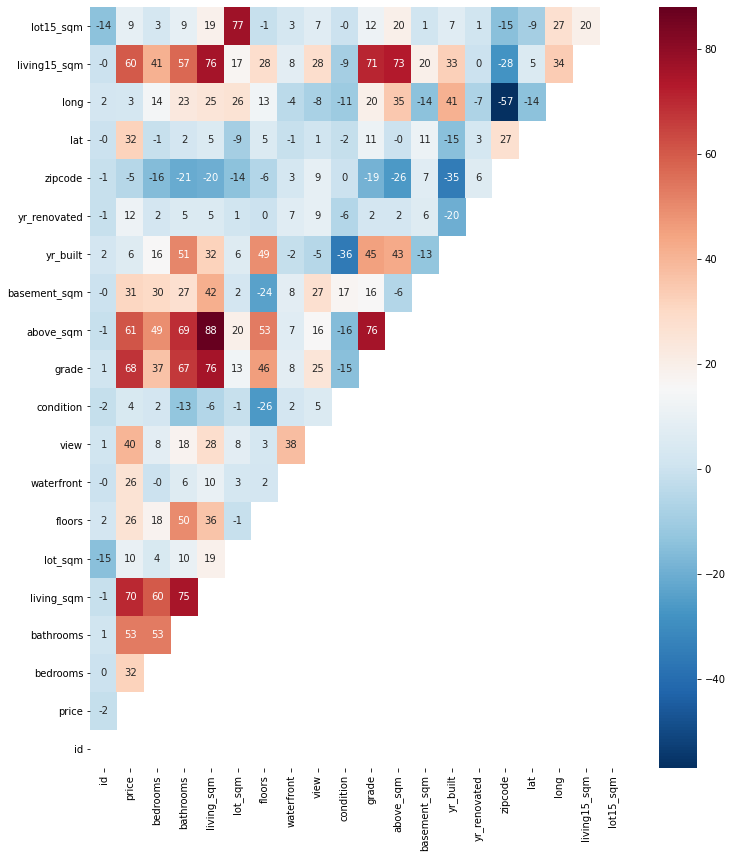

In [719]:
#house_dum = pd.get_dummies(house[continuous_var+categorical_var].copy())
mask = np.triu(house2.corr())
plt.figure(figsize=(12,14))
ax = sns.heatmap(round(house2.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')
ax.set_ylim((0,20));

**Plotting features after outlier removal**

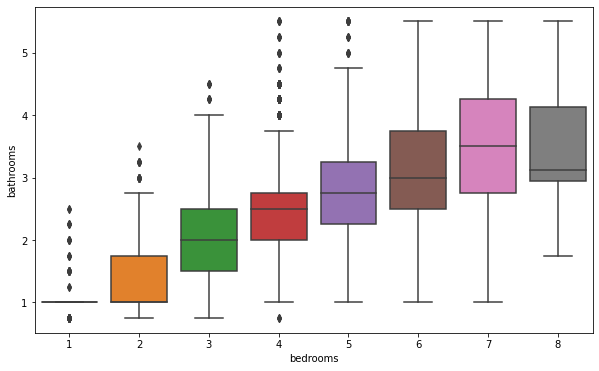

In [720]:
# plotting bedrooms and bathrooms
plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms", y="bathrooms", data=house2);

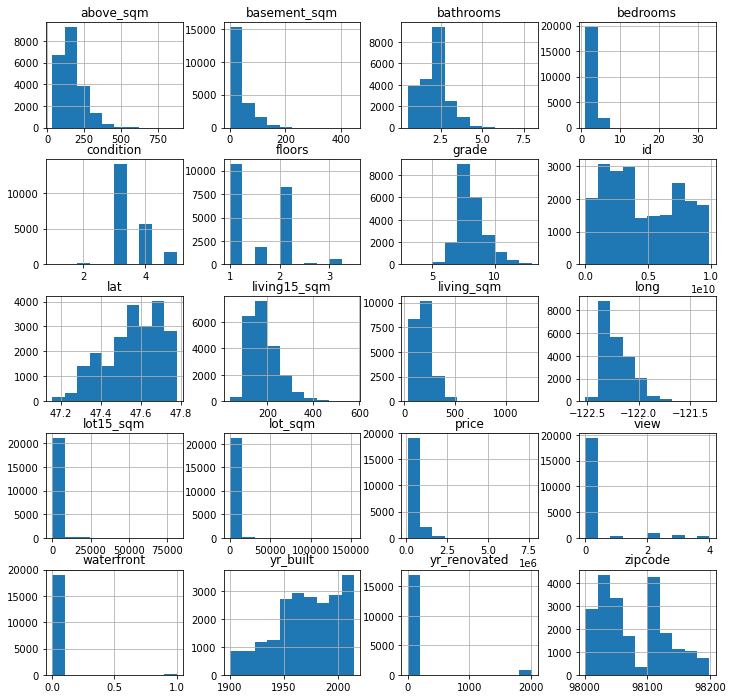

In [373]:
_ = house.hist(figsize=(12,12))

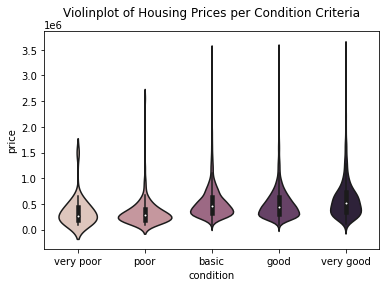

In [721]:
# set color
pal = sns.cubehelix_palette(5,rot=.45,light=.8)

cond = sns.violinplot(data=house2, x='condition', y='price', palette = pal)

# xlable titles
cond.set_xticklabels(("very poor", "poor", "basic", "good", "very good"));
cond.set_title("Violinplot of Housing Prices per Condition Criteria", pad=15);

**Commentary** 
Surprisingly, the condition criteria has little effect on the overall housing price. In fact, the distribution seems to be rather similar with outliers at the last 3 condition criteria

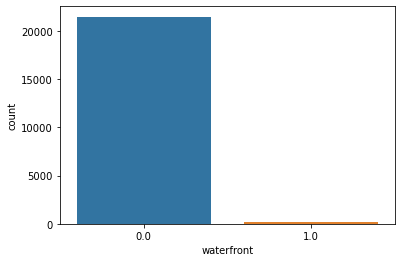

In [722]:
sns.countplot(x="waterfront", data=house2)

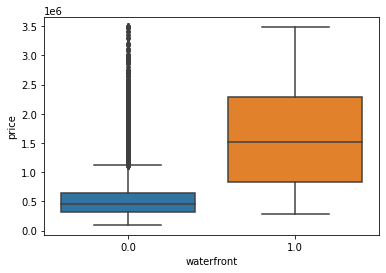

In [723]:
sns.boxplot(x="waterfront", y="price", data=house2)

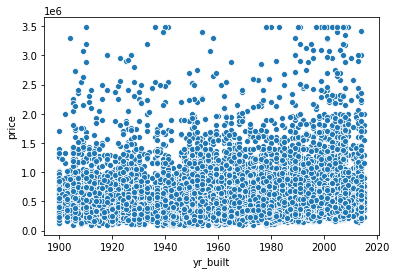

In [724]:
sns.scatterplot(y = "price", x = "yr_built", data = house2)

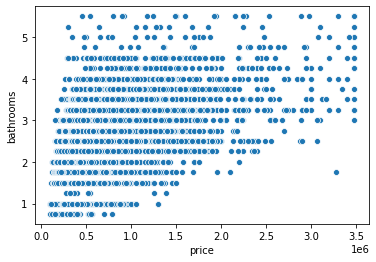

In [727]:
sns.scatterplot(x = "price", y = "bathrooms", data = house2)

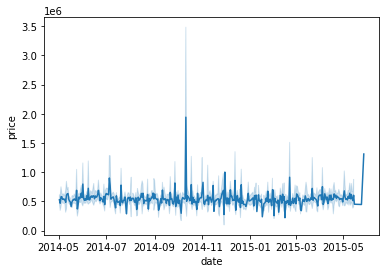

In [728]:
sns.lineplot(x="date", y="price", data=house2)

In [520]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [523]:
hist = [go.Histogram(x=house["yr_built"],xbins=dict(start=np.min(house["yr_built"]),size=1,end=np.max(house["yr_built"])),marker=dict(color='rgb(0,102,0)'))]

histlayout = go.Layout(title="Built Year Counts of Houses",xaxis=dict(title="Years"),yaxis=dict(title="Built Counts"))

histfig = go.Figure(data=hist,layout=histlayout)

iplot(histfig)

In [530]:
bar = [go.Bar(x=house["yr_built"],y=house["price"])]

histlayout = go.Layout(title="Housing prices over time",xaxis=dict(title="Years"),yaxis=dict(title="Home Prices"))

histfig = go.Figure(data=bar,layout=histlayout)

iplot(histfig)

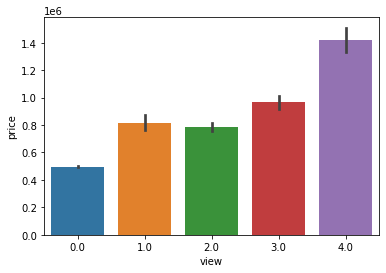

In [729]:
sns.barplot(x = "view", y = "price", data = house2)

# Feature Engineering

Now for the fun part. As they say, real estate prices are about location, location, location!
So it is time to make something useful out of the latitude and longitude data as well as the zip codes. 

I will begin this chapter looking at where King County is and plotting the lat and long data on a graph

## Geographical Features

King County is comprised of 4 different regions, which in turn contain a number of cities (most notably Seattle) and neighborhoods. 

In [38]:
Image("King County Regions.png", width = 400, height = 400)

NameError: name 'Image' is not defined

In [39]:
import plotly.express as px

In [730]:
fig = px.scatter(house2, x="long", y="lat", 
                 color="price", 
                 hover_data=['price'],
                 title="Price / Location Indication")
fig.show()

#documentation: https://plotly.com/python/reference/densitymapbox/
fig = px.density_mapbox(data=house, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1, 
                        mapbox_style="open-street-map")
fig.show()

TypeError: density_mapbox() got an unexpected keyword argument 'data'

In [731]:
fig = px.density_mapbox(house2, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1, 
                        mapbox_style="open-street-map")
fig.show()

**Commentary**

There is a lot going on here. First of all, we see that the data is much condensed around the Seattle area. 
Prices appear also to be more expensive there!
It certainly seems to worthwhile using the geographical coordinates to create a new column "city" to classify the data better

### Creating a new geographical feature called 'city'

I will start by merging the latitude and longitude data into tuples

In [732]:
house2['geo_coord'] = list(zip(house2['lat'], house2['long']))

In [733]:
house2.head()

id       date     price  bedrooms  bathrooms  living_sqm  \
0  7.129301e+09 2014-10-13  221900.0         3       1.00      109.63   
1  6.414100e+09 2014-12-09  538000.0         3       2.25      238.76   
2  5.631500e+09 2015-02-25  180000.0         2       1.00       71.54   
3  2.487201e+09 2014-12-09  604000.0         4       3.00      182.09   
4  1.954401e+09 2015-02-18  510000.0         3       2.00      156.08   

   lot_sqm  floors  waterfront  view  ...  basement_sqm  yr_built  \
0   524.90     1.0         0.0   0.0  ...          0.00      1955   
1   672.80     2.0         0.0   0.0  ...         37.16      1951   
2   929.03     1.0         0.0   0.0  ...          0.00      1933   
3   464.52     1.0         0.0   0.0  ...         84.54      1965   
4   750.66     1.0         0.0   0.0  ...          0.00      1987   

   yr_renovated  zipcode      lat     long  living15_sqm  lot15_sqm  \
0           0.0    98178  47.5112 -122.257        124.49     524.90   
1        1991.0    98125  47.7210 -122.319        157.01     709.69   
2           0.0    98028  47.7379 -122.233        252.70     748.98   
3           0.0    98136  47.5208 -122.393        126.35     464.52   
4           0.0    98074  47.6168 -122.045        167.23     697.05   

                        geo_coord  \
0             (47.5112, -122.257)   
1  (47.721000000000004, -122.319)   
2  (47.7379, -122.23299999999999)   
3  (47.5208, -122.39299999999999)   
4             (47.6168, -122.045)   

                                          geo_coord2  
0  {'country_code': 'US', 'city': 'Bryn Mawr-Skyw...  
1  {'country_code': 'US', 'city': 'Shoreline', 'c...  
2  {'country_code': 'US', 'city': 'Inglewood-Finn...  
3  {'country_code': 'US', 'city': 'White Center',...  
4  {'country_code': 'US', 'city': 'City of Sammam...  

[5 rows x 23 columns]

Next, using the `reverse_geocode` library, I reverse geocode the geographical data into city names

In [734]:
import reverse_geocode

In [735]:
coordinates = (house2['geo_coord'].tolist())
house2["geo_coord2"] = reverse_geocode.search(coordinates)

In [736]:
geo_data = pd.json_normalize(house2['geo_coord2'])

In [737]:
geo_data.head()

country_code                 city        country
0           US     Bryn Mawr-Skyway  United States
1           US            Shoreline  United States
2           US  Inglewood-Finn Hill  United States
3           US         White Center  United States
4           US    City of Sammamish  United States

Note that both the country_code and the country are not useful for this case. However, the city column provides valuable additional information for the dataframe

In [748]:
new_house = pd.concat([house2, geo_data], axis=1, join='outer', sort=False)
new_house.head().T

0  \
id                                                   7.1293e+09   
date                                        2014-10-13 00:00:00   
price                                                    221900   
bedrooms                                                      3   
bathrooms                                                     1   
living_sqm                                               109.63   
lot_sqm                                                   524.9   
floors                                                        1   
waterfront                                                    0   
view                                                          0   
condition                                                     3   
grade                                                         7   
above_sqm                                                109.63   
basement_sqm                                                  0   
yr_built                                                   1955   
yr_renovated                                                  0   
zipcode                                                   98178   
lat                                                     47.5112   
long                                                   -122.257   
living15_sqm                                             124.49   
lot15_sqm                                                 524.9   
geo_coord                                   (47.5112, -122.257)   
geo_coord2    {'country_code': 'US', 'city': 'Bryn Mawr-Skyw...   
country_code                                                 US   
city                                           Bryn Mawr-Skyway   
country                                           United States   

                                                              1  \
id                                                   6.4141e+09   
date                                        2014-12-09 00:00:00   
price                                                    538000   
bedrooms                                                      3   
bathrooms                                                  2.25   
living_sqm                                               238.76   
lot_sqm                                                   672.8   
floors                                                        2   
waterfront                                                    0   
view                                                          0   
condition                                                     3   
grade                                                         7   
above_sqm                                                 201.6   
basement_sqm                                              37.16   
yr_built                                                   1951   
yr_renovated                                               1991   
zipcode                                                   98125   
lat                                                      47.721   
long                                                   -122.319   
living15_sqm                                             157.01   
lot15_sqm                                                709.69   
geo_coord                        (47.721000000000004, -122.319)   
geo_coord2    {'country_code': 'US', 'city': 'Shoreline', 'c...   
country_code                                                 US   
city                                                  Shoreline   
country                                           United States   

                                                              2  \
id                                                   5.6315e+09   
date                                        2015-02-25 00:00:00   
price                                                    180000   
bedrooms                                                      2   
bathrooms                                                     1   
living_sqm                              

Country and country_code are not relevant for the analysis and therefore dropped

In [749]:
new_house.drop(labels = ["country","country_code"], axis = 1, inplace = True)

Also, geo_coord2 is no longer needed and also dropped

In [750]:
new_house.drop(labels = ["geo_coord2"], axis = 1, inplace = True)

In [751]:
new_house['city'].unique()

array(['Bryn Mawr-Skyway', 'Shoreline', 'Inglewood-Finn Hill',
       'White Center', 'City of Sammamish', 'Union Hill-Novelty Hill',
       'Federal Way', 'Des Moines', 'Maple Valley', 'Eastgate', 'Kenmore',
       'Seattle', 'Duvall', 'Auburn', 'Lea Hill', 'East Hill-Meridian',
       'Lake Forest Park', 'Redmond', 'Issaquah', 'Fairwood',
       'Lakeland North', 'Newcastle', 'Normandy Park', 'Fife Heights',
       'Klahanie', 'Renton', 'Medina', 'Covington', 'West Lake Sammamish',
       'Newport', 'Clyde Hill', 'Kingsgate', 'Lake Morton-Berrydale',
       'Black Diamond', 'Ravensdale', 'Boulevard Park', 'Mercer Island',
       'Hobart', 'Tanner', 'Cottage Lake', 'Sammamish', 'Woodway',
       'Bellevue', 'Browns Point', 'Snoqualmie', 'Brier', 'Fall City',
       'Enumclaw', 'East Renton Highlands', 'Mirrormont', 'Burien',
       'Yarrow Point', 'Kirkland', 'Riverton', 'Bothell', 'Kent',
       'Maple Heights-Lake Desire', 'Wilderness Rim', 'SeaTac', 'Vashon',
       'Woodinville', 

In [752]:
new_house.groupby('city').describe()['price']

count          mean            std       min        25%  \
city                                                                       
Algona            42.0  2.686163e+05  117374.100506  100000.0  196830.00   
Ames Lake        113.0  7.321290e+05  336115.074047  170000.0  539000.00   
Auburn           177.0  2.379007e+05   77358.921883   95894.0  194900.00   
Bellevue         195.0  1.053649e+06  500529.227444  419000.0  729516.00   
Black Diamond     86.0  3.914773e+05  176687.258018  156601.0  258125.00   
...                ...           ...            ...       ...        ...   
White Center    1380.0  4.251677e+05  207236.298239   95894.0  299725.00   
Wilderness Rim    49.0  4.015762e+05  334983.582934  175000.0  270000.00   
Woodinville      179.0  5.640554e+05  198594.327674  203700.0  446000.00   
Woodway           45.0  6.830867e+05  343606.222560  299950.0  465250.00   
Yarrow Point     202.0  1.115499e+06  588226.642163  395000.0  675275.25   

                     50%        75%        max  
city                                            
Algona          232500.0   283250.0   549950.0  
Ames Lake       695000.0   830000.0  2280000.0  
Auburn          229950.0   265000.0   799950.0  
Bellevue        875000.0  1225000.0  3480600.0  
Black Diamond   348750.0   463750.0   935000.0  
...                  ...        ...        ...  
White Center    381000.0   500000.0  2230000.0  
Wilderness Rim  305000.0   345000.0  1950000.0  
Woodinville     521900.0   614642.5  1570000.0  
Woodway         605000.0   775000.0  2010000.0  
Yarrow Point    957500.0  1337500.0  3480600.0  

[80 rows x 8 columns]

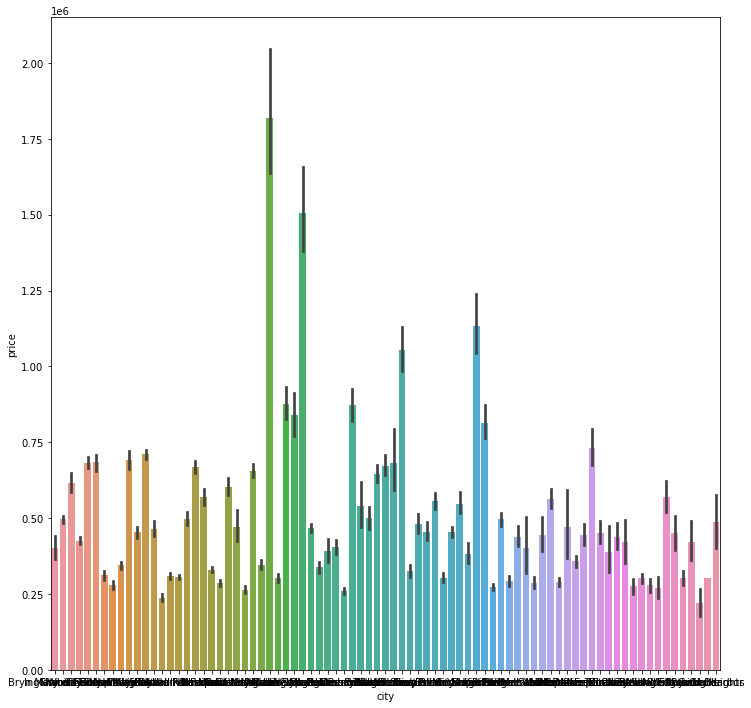

In [70]:
plt.figure(figsize=(12,12))
sns.barplot(x='city', y='price', data=new_house);

## Renovated Yes / No

In [753]:
new_house['renovated'] = new_house['yr_renovated'].apply(lambda x:1 if x !=0 else 0)
new_house.head()

id       date     price  bedrooms  bathrooms  living_sqm  \
0  7.129301e+09 2014-10-13  221900.0         3       1.00      109.63   
1  6.414100e+09 2014-12-09  538000.0         3       2.25      238.76   
2  5.631500e+09 2015-02-25  180000.0         2       1.00       71.54   
3  2.487201e+09 2014-12-09  604000.0         4       3.00      182.09   
4  1.954401e+09 2015-02-18  510000.0         3       2.00      156.08   

   lot_sqm  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0   524.90     1.0         0.0   0.0  ...      1955           0.0    98178   
1   672.80     2.0         0.0   0.0  ...      1951        1991.0    98125   
2   929.03     1.0         0.0   0.0  ...      1933           0.0    98028   
3   464.52     1.0         0.0   0.0  ...      1965           0.0    98136   
4   750.66     1.0         0.0   0.0  ...      1987           0.0    98074   

       lat     long  living15_sqm  lot15_sqm                       geo_coord  \
0  47.5112 -122.257        124.49     524.90             (47.5112, -122.257)   
1  47.7210 -122.319        157.01     709.69  (47.721000000000004, -122.319)   
2  47.7379 -122.233        252.70     748.98  (47.7379, -122.23299999999999)   
3  47.5208 -122.393        126.35     464.52  (47.5208, -122.39299999999999)   
4  47.6168 -122.045        167.23     697.05             (47.6168, -122.045)   

                  city  renovated  
0     Bryn Mawr-Skyway          0  
1            Shoreline          1  
2  Inglewood-Finn Hill          0  
3         White Center          0  
4    City of Sammamish          0  

[5 rows x 24 columns]

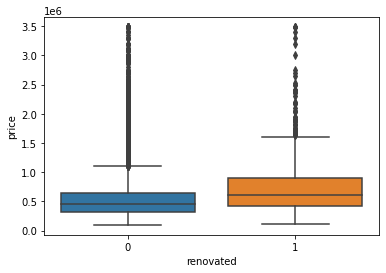

In [744]:
sns.boxplot(x='renovated', y='price', data=new_house)

## Selecting the houses for our client

**Selection criteria:**

1. 2 bedrooms 
2. 2 bathrooms
3. waterfront
5. modern house i.e. either house build after 1990 or renovated since then

In [745]:
recommendation = new_house.query("bedrooms >= 2 and bathrooms >=2 and waterfront == 1 and (yr_built >= 1990 or yr_renovated >=1990)")

In [746]:
recommendation.shape

(43, 24)

Looking at the criteria of our client, only 43 homes that have been sold have satisfied his criteria. 

In [754]:
recommendation_reg = recommendation.groupby("city").median()

In [756]:
rec_df = recommendation[recommendation.groupby('city').city.transform('count')>2].copy()

In [757]:
rec_df['price_per_living_sqm']=rec_df['price']/rec_df['living_sqm']

In [761]:
rec_df['price_per_lot_sqm']=rec_df['price']/rec_df['lot_sqm']

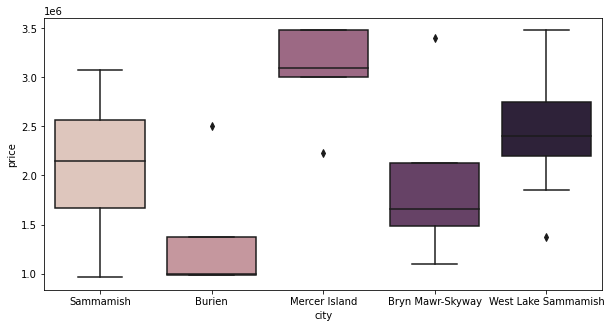

In [758]:
plt.figure(figsize=(10,5))
sns.boxplot(x='city', y='price', data=rec_df, palette=pal)

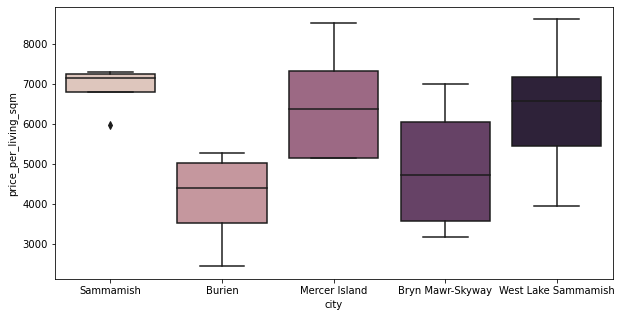

In [759]:
plt.figure(figsize=(10,5))
sns.boxplot(x='city', y='price_per_living_sqm', data=rec_df, palette=pal);

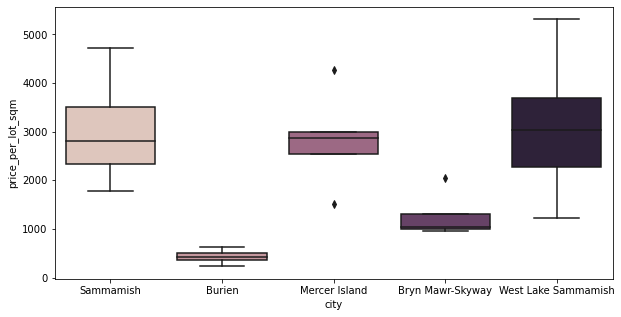

In [762]:
plt.figure(figsize=(10,5))
sns.boxplot(x='city', y='price_per_lot_sqm', data=rec_df, palette=pal);

Focus on the top 5 cities with the most offers

In [763]:
# 1. Draw the map background
fig = px.scatter(rec_df, x="living_sqm", y="price", 
                 color="city",
                 size='lot_sqm',
                 hover_data=['price','city', 'bathrooms', 'bedrooms'],
                 title="Price / Location Finder")
#fig.update_layout(
#   xaxis = dict(
#       tickmode = 'array',
#       tickvals = [-122.365, -122.225, -122.082],
#       ticktext = ['Burien', 'Bryn Mawr-Skyway & Mercer Island', 'Sammamish']),
#   yaxis = dict(
#       tickmode = 'array',
#       tickvals = [47.473, 47.534, 47.603],
#       ticktext = ['Puget Sound' ,'Lake Washington', 'Lake Sammamish']))

fig.show()

#documentation: https://plotly.com/python/reference/densitymapbox/
fig = px.density_mapbox(data_frame=rec_df, lat='lat', lon='long', z='price', radius=6,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1, 
                        mapbox_style="open-street-map")
fig.show()

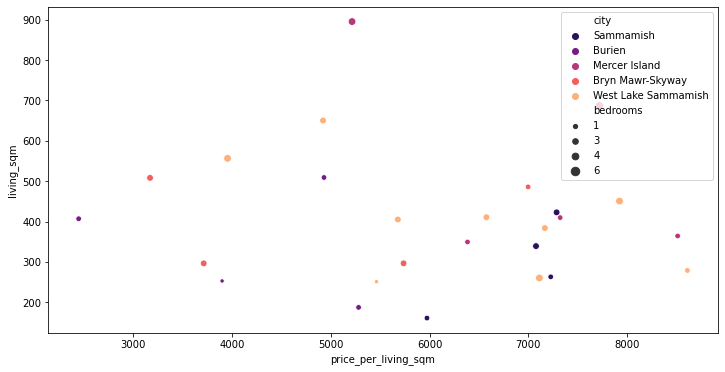

In [253]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="price_per_living_sqm", y = "living_sqm", size="bedrooms", hue='city',data=rec_df, palette='magma')

### Final Recommendation 

**Notable Findings:**
1. There are strong differences in price per square meter within the 5 most interesting districts
    * median of around 3000 for Burien and 7000 for Sammamish
2. The most prominent area for wealthy people, namely Bellevue is not represented in the target districts
3. Only 43 homes fulfill the criteria set by our client
4. The size of the property is not the decisive factor for the price

**Recommendations:**

**Maximizing space for price:**
* The homes in **Burien** have both the lowest price per living and lot square meter while offerings the largest lot size under satisfaction of all other criteria 

**Total exclusivity**:
* Mercer Island and the Sammamish region are a level above all other regions both in absolute prices as well as prices per square meter

**Finding the best of both worlds**: 
* Get more for your money in Byrn Mawr-Skyway which offers better prices for large homes with decent lot sizes in the city center 


As a final recommendation, let's examine the cost of the waterfront view

In [764]:
recommendation2 = new_house.query("bedrooms >= 2 and bathrooms >=2 and waterfront == 0 and (yr_built >= 1990 or yr_renovated >=1990)")

In [765]:
recommendation2.shape

(6883, 24)

In [261]:
rec2 = recommendation2[recommendation2.groupby('city').city.transform('count')>2].copy()

In [262]:
rec2['price_per_living_sqm']=rec2['price']/rec2['living_sqm']

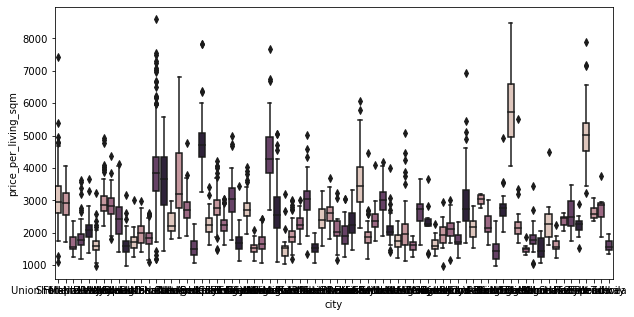

In [263]:
plt.figure(figsize=(10,5))
sns.boxplot(x='city', y='price_per_living_sqm', data=rec2, palette=pal)

#  Model Prediction

The following sections will now primarily address **Goals 2 and 3** - predicting the **sales price**

##  Simple linear regression

In [264]:
label = new_house['price']

In [419]:
# get dummy data for categorical variables

categorical_var=new_house['city']
categorical_var = pd.get_dummies(data=categorical_var, drop_first=True)
categorical_var.head()

Ames Lake  Auburn  Bellevue  Black Diamond  Bothell  Boulevard Park  Brier  \
0          0       0         0              0        0               0      0   
1          0       0         0              0        0               0      0   
2          0       0         0              0        0               0      0   
3          0       0         0              0        0               0      0   
4          0       0         0              0        0               0      0   

   Browns Point  Bryn Mawr-Skyway  Buckley  ...  Tanner  Tukwila  \
0             0                 1        0  ...       0        0   
1             0                 0        0  ...       0        0   
2             0                 0        0  ...       0        0   
3             0                 0        0  ...       0        0   
4             0                 0        0  ...       0        0   

   Union Hill-Novelty Hill  Vashon  West Lake Sammamish  White Center  \
0                        0       0                    0             0   
1                        0       0                    0             0   
2                        0       0                    0             0   
3                        0       0                    0             1   
4                        0       0                    0             0   

   Wilderness Rim  Woodinville  Woodway  Yarrow Point  
0               0            0        0             0  
1               0            0        0             0  
2               0            0        0             0  
3               0            0        0             0  
4               0            0        0             0  

[5 rows x 80 columns]

In [708]:
new_house['bathrooms']=new_house['bathrooms'].astype(int)

In [709]:
continuous_var = list(new_house.select_dtypes(
                        ['int64','float64','bool']).columns.values)

In [710]:
new_house2 = new_house.copy()

In [713]:
new_house2 = pd.concat([new_house, categorical_var], axis=1, join='outer', sort=False)

id         price      bedrooms     bathrooms    living_sqm  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      1.750660    193.268173   
std    2.876736e+09  3.673681e+05      0.926299      0.734042     85.294829   
min    1.000102e+06  7.800000e+04      1.000000      0.000000     34.370000   
25%    2.123049e+09  3.220000e+05      3.000000      1.000000    132.850000   
50%    3.904930e+09  4.500000e+05      3.000000      2.000000    177.440000   
75%    7.308900e+09  6.450000e+05      4.000000      2.000000    236.900000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000   1257.910000   

             lot_sqm        floors    waterfront          view     condition  \
count   21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean     1402.780390      1.494096      0.006760      0.233181      3.409825   
std      3847.358171      0.539683      0.081944      0.764673      0.650546   
min        48.310000      1.000000      0.000000      0.000000      1.000000   
25%       468.230000      1.000000      0.000000      0.000000      3.000000   
50%       707.740000      1.500000      0.000000      0.000000      3.000000   
75%       992.670000      2.000000      0.000000      0.000000      4.000000   
max    153416.210000      3.500000      1.000000      4.000000      5.000000   

       ...        Tanner       Tukwila  Union Hill-Novelty Hill        Vashon  \
count  ...  21597.000000  21597.000000             21597.000000  21597.000000   
mean   ...      0.002824      0.002778                 0.015095      0.001621   
std    ...      0.053072      0.052636                 0.121932      0.040225   
min    ...      0.000000      0.000000                 0.000000      0.000000   
25%    ...      0.000000      0.000000                 0.000000      0.000000   
50%    ...      0.000000      0.000000                 0.000000      0.000000   
75%    ...      0.000000      0.000000                 0.000000      0.000000   
max    ...      1.000000      1.000000                 1.000000      1.000000   

       West Lake Sammamish  White Center  Wilderness Rim   Woodinville  \
count         21597.000000  21597.000000    21597.000000  21597.000000   
mean              0.015836      0.063898        0.002269      0.008288   
std               0.124842      0.244576        0.047579      0.090664   
min               0.000000      0.000000        0.000000      0.000000   
25%               0.000000      0.000000        0.000000      0.000000   
50%               0.000000      0.000000        0.000000      0.000000   
75%               0.000000      0.000000        0.000000      0.000000   
max               1.000000      1.000000        1.000000      1.000000   

            Woodway  Yarrow Point  
count  21597.000000  21597.000000  
mean       0.002084      0.009353  
std        0.045600      0.096261  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 101 columns]

Plot correlation matrix to find most relevant feature

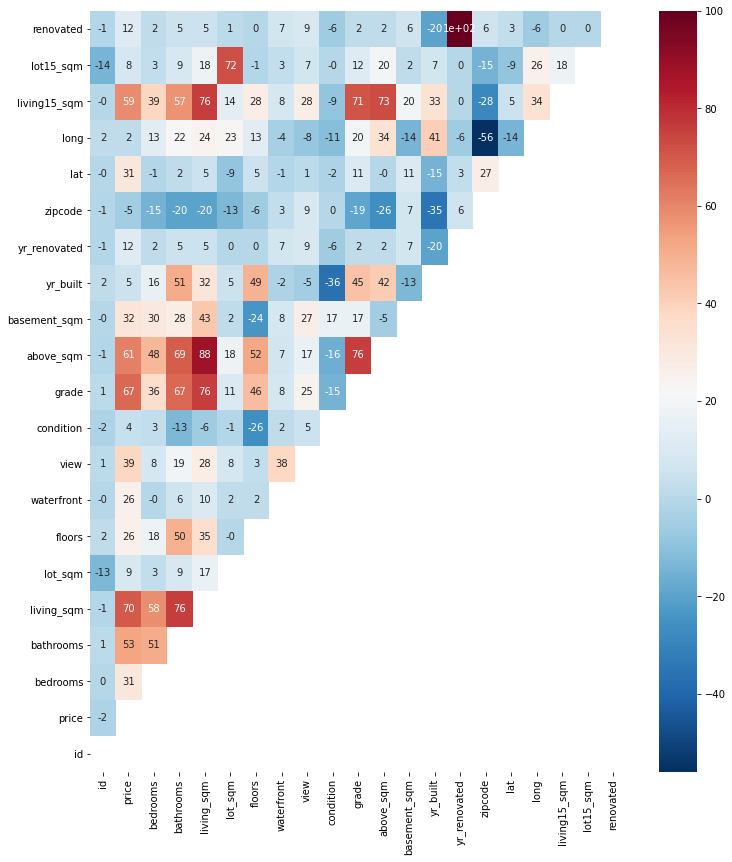

In [552]:
mask = np.triu(new_house.corr())
plt.figure(figsize=(12,14))
ax = sns.heatmap(round(new_house.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')
ax.set_ylim((0,21));

In [541]:
# Living square meter has the highest correlation with price at 0.7
# Therefore, living_sqm is used for the simple linear regression

In [404]:
import statsmodels.formula.api as smf

regression1 = smf.ols(formula='price ~ living_sqm', data=new_house).fit()

In [308]:
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:18:07   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
living_sqm  3023.1850     20.876    144.819      0.000    2982.267    3064.103
==============================================================================
Omnibus:                    14801.943   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.685
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                         523.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Commentary**

The simple regression with feature 'living_sqm' is only a mediocre predictor of the house price. 
Next, I will increase the number of features to improve the model. 

## Multiple linear regression

Looking at the correlation matrix, I will be extending the linear regression model with the following features:
  
  **Categorical**
   1. city # added feature
   
  **Numeric**
   1. basement_sqm # less correlated with the other numerical features
   2. grade 
   3. waterfront
   4. view 
   5. floors
   6. bedrooms
   7. bathrooms
   8. renovated
   
  **Omitted**
   1. above_sqm 
   2. living15_sqm
   3. yr_built
   4. zipcode 
   5. lat
   6. long
   7. zipcode 
   8. condition # high correlation to other features
   
   

In [553]:
numeric_features = list(new_house.columns[new_house.dtypes!=object])
numeric_features.remove('living15_sqm')
numeric_features.remove('id')
numeric_features.remove('lot_sqm')
numeric_features.remove('date')
numeric_features.remove('above_sqm')
numeric_features.remove('condition')
numeric_features.remove('yr_built')
numeric_features.remove('zipcode')
numeric_features.remove('yr_renovated')
numeric_features.remove('lat')
numeric_features.remove('long')
numeric_features.remove('lot15_sqm')
numeric_features.remove('price')
numeric_features

['bedrooms',
 'bathrooms',
 'living_sqm',
 'floors',
 'waterfront',
 'view',
 'grade',
 'basement_sqm',
 'renovated']

In [555]:
categoric_features=['city']
categoric_features

['city']

**1st: Without the categorical value "city"**

In [562]:
regression2 = smf.ols(formula='price ~ living_sqm + bedrooms + bathrooms + floors + waterfront + view + renovated + grade + basement_sqm', data=new_house).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3608.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:40:59   Log-Likelihood:            -2.9748e+05
No. Observations:               21597   AIC:                         5.950e+05
Df Residuals:                   21587   BIC:                         5.951e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.089e+05   1.44e+04    -35.432      0.000   -5.37e+05   -4.81e+05
living_sqm    1954.5161     39.521     49.455      0.000    1877.053    2031.980
bedrooms     -2.926e+04   2171.289    -13.476      0.000   -3.35e+04    -2.5e+04
bathrooms    -1.933e+04   3517.818     -5.494      0.000   -2.62e+04   -1.24e+04
floors       -1.097e+04   3899.694     -2.814      0.005   -1.86e+04   -3330.964
waterfront    6.056e+05   2.09e+04     28.973      0.000    5.65e+05    6.47e+05
view          6.036e+04   2377.629     25.388      0.000    5.57e+04     6.5e+04
renovated     1.369e+05   8724.277     15.690      0.000     1.2e+05    1.54e+05
grade         1.035e+05   2285.645     45.263      0.000     9.9e+04    1.08e+05
basement_sqm   462.7552     50.288      9.202      0.000     364.187     561.323
==============================================================================
Omnibus:                    15403.589   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           859564.175
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      33.377   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2nd: Including the categorical value "city"**

In [572]:
regression3 = smf.ols(formula='price ~ living_sqm + bedrooms + bathrooms + floors + waterfront + view + renovated + grade + basement_sqm + city', data=new_house).fit()
regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     843.4
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:49:22   Log-Likelihood:            -2.9117e+05
No. Observations:               21597   AIC:                         5.825e+05
Df Residuals:                   21507   BIC:                         5.832e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -4.314e+05   2.88e+04    -14.961      0.000   -4.88e+05   -3.75e+05
city[T.Ames Lake]                  1.181e+05   3.15e+04      3.752      0.000    5.64e+04     1.8e+05
city[T.Auburn]                     3.729e+04   2.98e+04      1.250      0.211   -2.12e+04    9.58e+04
city[T.Bellevue]                   5.592e+05   2.96e+04     18.871      0.000    5.01e+05    6.17e+05
city[T.Black Diamond]              5.332e+04   3.27e+04      1.630      0.103   -1.08e+04    1.17e+05
city[T.Bothell]                    1.055e+05   3.15e+04      3.354      0.001    4.38e+04    1.67e+05
city[T.Boulevard Park]             1.139e+05   2.93e+04      3.889      0.000    5.65e+04    1.71e+05
city[T.Brier]                      1.256e+05   3.57e+04      3.522      0.000    5.57e+04    1.95e+05
city[T.Browns Point]              -9.362e+04   3.19e+04     -2.935      0.003   -1.56e+05   -3.11e+04
city[T.Bryn Mawr-Skyway]            1.06e+05   2.84e+04      3.737      0.000    5.04e+04    1.62e+05
city[T.Buckley]                    -913.2443   5.52e+04     -0.017      0.987   -1.09e+05    1.07e+05
city[T.Burien]                     8.268e+04   2.92e+04      2.836      0.005    2.55e+04     1.4e+05
city[T.Carnation]                  1.486e+05   3.79e+04      3.919      0.000    7.43e+04    2.23e+05
city[T.City of Sammamish]           1.67e+05   2.81e+04      5.945      0.000    1.12e+05    2.22e+05
city[T.Clyde Hill]                 8.782e+05   3.24e+04     27.066      0.000    8.15e+05    9.42e+05
city[T.Cottage Lake]               1.372e+05   2.86e+04      4.801      0.000    8.12e+04    1.93e+05
city[T.Covington]                  -199.8270   2.89e+04     -0.007      0.994   -5.68e+04    5.64e+04
city[T.Des Moines]                 1.951e+04   2.88e+04      0.677      0.499    -3.7e+04     7.6e+04
city[T.Duvall]                     7.857e+04   2.98e+04      2.634      0.008    2.01e+04    1.37e+05
city[T.East Hill-Meridian]         1.309e+04   2.79e+04      0.469      0.639   -4.17e+04    6.79e+04
city[T.East Renton Highlands]      6.042e+04   2.89e+04      2.088      0.037    3691.343    1.17e+05
city[T.Eastgate]                   2.606e+05   2.84e+04      9.172      0.000    2.05e+05    3.16e+05
city[T.Edgewood]                  -4.026e+04   4.39e+04     -0.917      0.359   -1.26e+05    4.58e+04
city[T.Enumclaw]                   7115.6131   2.95e+04      0.241      0.809   -5.07e+04    6.49e+04
city[T.Esperance]                  1.456e+05   3.46e+04      4.203      0.000    7.77e+04    2.14e+05
city[T.Fairwood]                   5.761e+04   2.81e+04      2.053      0.040    2599.199    1.13e+05
city[T.Fall City]                  8.614e+04    2.9e+04      2.975      0.003    2.94e+04    1.43e+05
city[T.Federal Way]    

**Commentary**

Include the geographical feature city greatly improves the performance of the model to an **r-square value of 0.77**

## Training the model 

In [706]:
X = new_house[['living_sqm', 'bedrooms', 'bathrooms', 'floors',
                'waterfront', 'view', 'renovated', 'grade', 
                'basement_sqm']]
y = new_house['price']

In [576]:
from sklearn.model_selection import train_test_split

In [668]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

In [669]:
from sklearn.linear_model import LinearRegression

In [670]:
lm = LinearRegression()

In [671]:
lm.fit(X_train, y_train)

LinearRegression()

In [672]:
print(lm.intercept_)

-525537.1420139226


In [673]:
lm.coef_

array([ 1.85660153e+03, -2.39811964e+04, -2.58355878e+04, -7.71621884e+03,
        6.14636024e+05,  5.82571735e+04,  1.50166635e+05,  1.06391719e+05,
        5.16125181e+02])

In [674]:
X.columns

Index(['living_sqm', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'renovated', 'grade', 'basement_sqm'],
      dtype='object')

In [675]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["coefficients"])

In [676]:
coeff_df

coefficients
living_sqm      1856.601532
bedrooms      -23981.196404
bathrooms     -25835.587810
floors         -7716.218838
waterfront    614636.024011
view           58257.173526
renovated     150166.635156
grade         106391.718861
basement_sqm     516.125181

In [677]:
predictions = lm.predict(X_test)

In [678]:
predictions

array([416492.47231879, 253786.91748156, 996457.03760626, ...,
       484087.77072431, 420456.30417927, 361856.6133737 ])

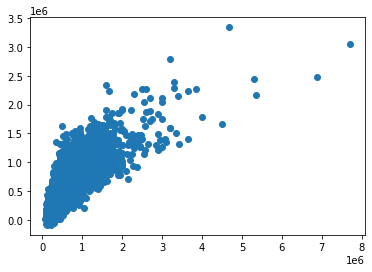

In [679]:
plt.scatter(y_test, predictions)

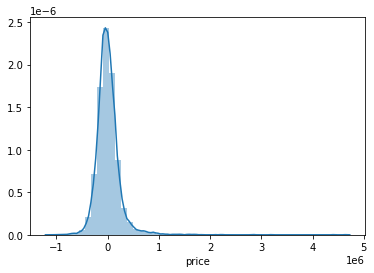

In [680]:
sns.distplot((y_test - predictions))

**Computing the RMSE**

Root Mean Square Error is the standard deviation of the residuals(prediction errors). Residuals are a measure of how far from the regression line data points are. The lower the RMSE value, the model would be fit well.

In [681]:
from sklearn import metrics

In [682]:
metrics.r2_score(y_test, predictions)

0.6029244193302887

In [683]:
metrics.mean_squared_error(y_test, predictions)

57180670843.15247

In [684]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

239124.80181518703

## Improving the model

Since some coefficients are positive while others are negative, I will try to perform a second test model in which all features with negative coefficients are removed.  

In [702]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

In [703]:
lm = LinearRegression()
lm.fit(X_train, y_train)

ValueError: could not convert string to float: 'Shoreline'

In [693]:
X.columns

Index(['bathrooms', 'living_sqm', 'lot_sqm', 'waterfront', 'view', 'condition',
       'grade', 'above_sqm', 'basement_sqm', 'lat', 'living15_sqm'],
      dtype='object')

In [689]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["coefficients"])
coeff_df

coefficients
bathrooms     -14663.542846
living_sqm      1264.217576
lot_sqm           -0.826121
waterfront    628332.004951
view           68672.473413
condition      54876.124685
grade          89011.500368
above_sqm        550.888881
basement_sqm     513.199897
lat           670107.814321
living15_sqm     151.475189

In [690]:
predictions = lm.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 11)

In [504]:
plt.scatter(y2_test, predictions2)

NameError: name 'predictions2' is not defined